In [15]:
import sys
import os
import importlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

import dart.Util
import dart.metrics.start_calculations

In [2]:
config = {
    'test_size': 1000, 
    'metrics':  ['calibration', 'fragmentation', 'activation', 'representation', 'alternative_voices'],
    'cutoff': [1, 2, 5, 10, 20, 0],
    'algorithms': ['lstur', 'pop', 'random'],
    'output_folder': 'output/',
    'language': 'english'
}

In [3]:
articles, recommendations, behavior_file = dart.Util.read_files()

In [4]:
calculator = dart.metrics.start_calculations.MetricsCalculator(config, articles, recommendations, behavior_file)

2022-11-23 13:47:24.307390	starting calculations
0/1000
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
18000 successfully calculated
0 failed
2022-11-23 13:52:33.087577	done


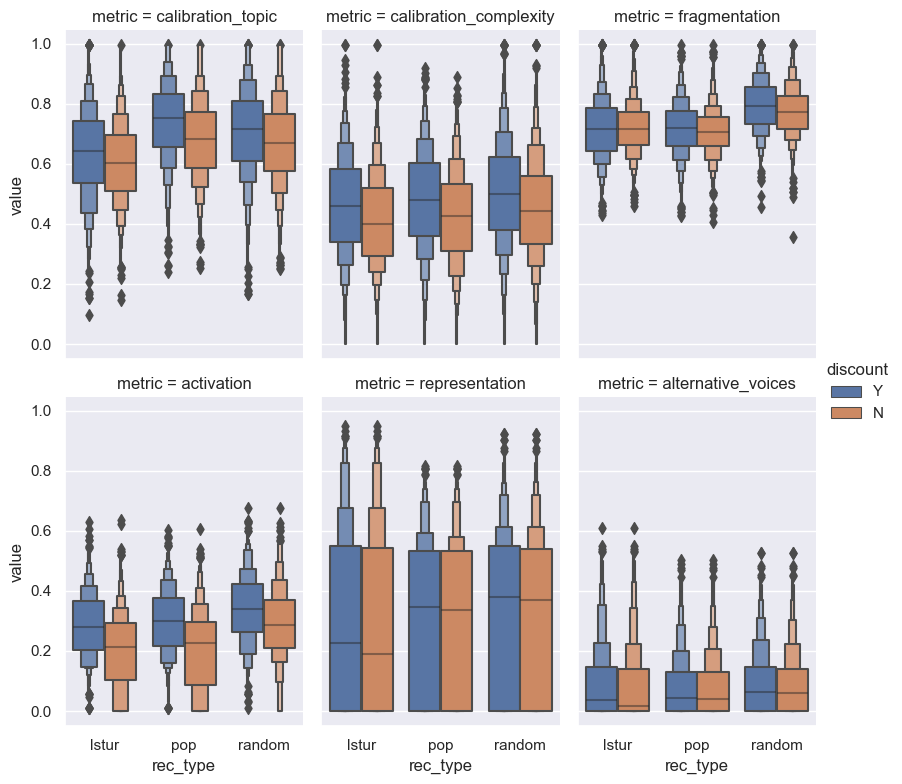

In [5]:
df = calculator.execute()

RADio attempts to capture five normative concepts in news reccomendations. These are:
- Calibration (topics): Article subcategories as provided in the MIND dataset
- Calibration (complexity): article complexity as calculated with the Flesh-Kincaid reading ease tes
- Fragmentation: Recommended news story chains, which are identified following the procedure in (ADD!!!)
- Activation: affect scores, which is approximated by the absolute value of a sentinetnt analysis score
- Representation: The presence of political actors
- Alternative voices: the presence of minority voices versus majordity voices. We identifty someone asa minority voice when they are identified as a person through the NLP pipeline, but cannot be linked toa wikipedia page

In [6]:
df.head()

,impr_index,rec_type,cutoff,distance,discount,metric,value
0,19401,lstur,1,kl,Y,calibration_topic,6.870941
1,19401,lstur,1,jsd,Y,calibration_topic,0.730546
2,19401,lstur,1,kl,N,calibration_topic,4.913138
3,19401,lstur,1,jsd,N,calibration_topic,0.587294
4,19401,lstur,1,kl,Y,calibration_complexity,6.967648


Values in the framework, are measured on two scales. For the purpose of this workshop, only the Jensen Shannon divergence is used, since this is a normalized value and allows for more intuitive comparison

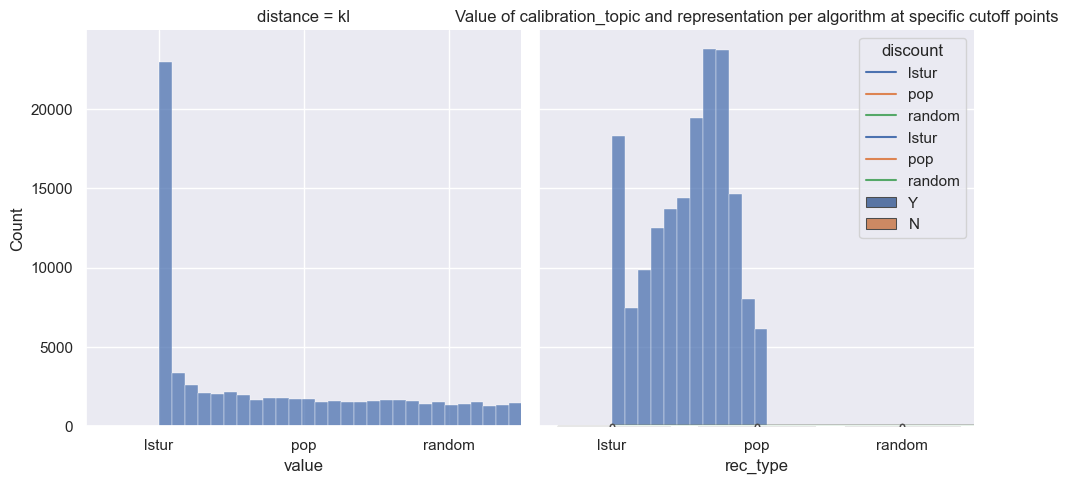

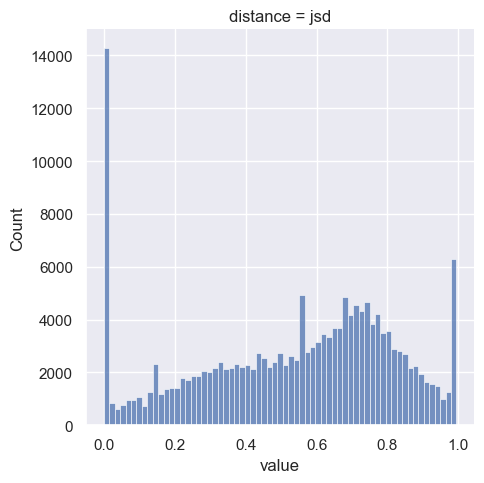

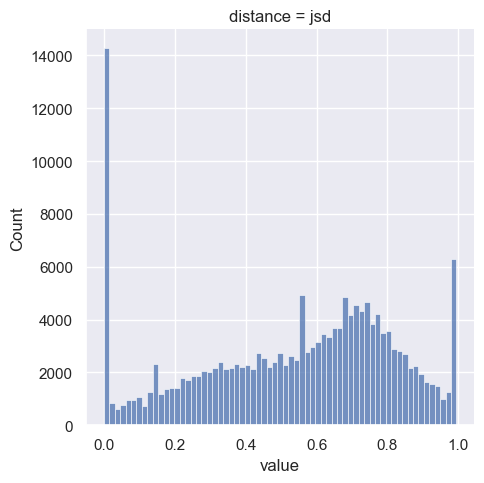

In [16]:
sns.displot(data=df, x="value", col="distance", kde=False)
plt.show()

In [8]:
df = df[df['distance'] == 'jsd']
df.head()

,impr_index,rec_type,cutoff,distance,discount,metric,value
1,19401,lstur,1,jsd,Y,calibration_topic,0.730546
3,19401,lstur,1,jsd,N,calibration_topic,0.587294
5,19401,lstur,1,jsd,Y,calibration_complexity,0.737728
7,19401,lstur,1,jsd,N,calibration_complexity,0.767838
9,19401,lstur,1,jsd,Y,fragmentation,0.994280


All values theoretically range from 0-1 now.

In [9]:
for metric in df['metric'].unique():
    
    min = df[df['metric'] == metric]["value"].min()
    max = df[df['metric'] == metric]["value"].max()
    print(f'{metric.upper()}: ranges from {min} to {max}')

CALIBRATION_TOPIC: ranges from 0.0 to 0.9942797605616538
CALIBRATION_COMPLEXITY: ranges from 0.0 to 0.9942797605616537
FRAGMENTATION: ranges from 0.35543303448258623 to 0.9942797605616536
ACTIVATION: ranges from 0.0 to 0.9819446000459985
REPRESENTATION: ranges from 0.0 to 0.9475245535670622
ALTERNATIVE_VOICES: ranges from 0.0 to 0.6080512142620448


Multiple algorithms are used in the framework to estimate these values. These algorithms are
- LSTUR
- NAML
- NPA
- NRMS
- Most popular
- Random
The differences in the values can be retrieved by the following:

CALIBRATION_TOPIC
lstur: 0.6653996529110917
pop: 0.7743521709887973
random: 0.7364698214649812
CALIBRATION_COMPLEXITY
lstur: 0.5228312749886457
pop: 0.5396255264841923
random: 0.5520237517888783
FRAGMENTATION
lstur: 0.745540969366991
pop: 0.7517864870297282
random: 0.8101803358727939
ACTIVATION
lstur: 0.37378822146368323
pop: 0.3857387974544547
random: 0.4205002884571115
REPRESENTATION
lstur: 0.2900635426172335
pop: 0.29281358274984454
random: 0.3386752933421734
ALTERNATIVE_VOICES
lstur: 0.09602195523244789
pop: 0.08286344589556037
random: 0.10177181678855017


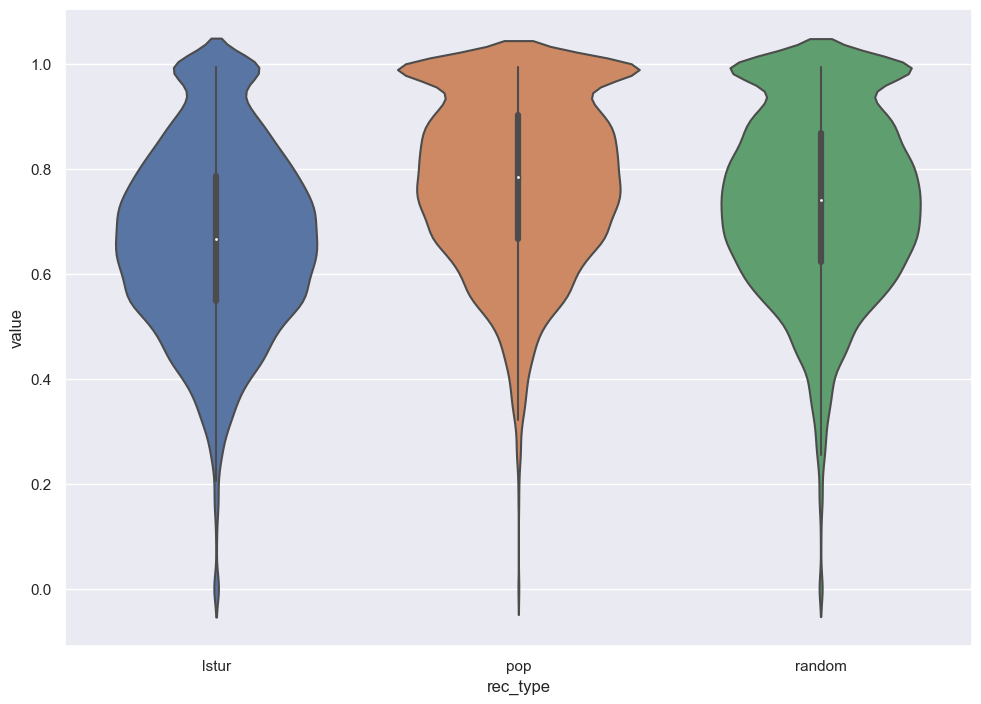

In [17]:
for metric in df['metric'].unique():
    print(metric.upper())
    for rec in df['rec_type'].unique():
        mean = df[df['metric'] == metric][df["rec_type"] == rec]["value"].mean()
        print(f'{rec}: {mean}')
# Notice that, due to the normalized values, the differences in algorithms can also easily be interpreted!
sns.violinplot(data=df[df["metric"] == "calibration_topic"], x="rec_type", y="value")

tabledata = df[df['discount'] == "Y"]
table = pd.DataFrame(columns=['Algorithms'])
table = table.set_index('Algorithms')
for metric in tabledata['metric'].unique():
    for rec in tabledata['rec_type'].unique():
        mean = tabledata[tabledata['metric'] == metric][tabledata["rec_type"] == rec]["value"].mean()
        table.at[rec, metric] = mean
table
plt.show()

Finally, the framework differentate between reccomender systems that takes ranking into account. That is: something displayed at the top, is seen as more valuable. And also how many are displayed to the user known as the cutoff.

In [11]:
print("Means of 'calibration_topic' for rank awareness")
for discount in df['discount'].unique():
    mean = df[df['metric'] == 'calibration_topic'][df['discount'] == discount]["value"].mean()
    print(f'{discount}: {mean}')

print("Means of 'calibration_topic' for different cutoff points")
for cutoff in df['cutoff'].unique():
    mean = df[df['metric'] == 'calibration_topic'][df['cutoff'] == cutoff]["value"].mean()
    print(f'{cutoff}: {mean}')


Means of 'calibration_topic' for rank awareness
Y: 0.7400352943942059
N: 0.710779135849047
Means of 'calibration_topic' for different cutoff points
1: 0.8392323071901145
2: 0.7866402633472378
5: 0.7085166602996322
10: 0.6726846866309137
20: 0.6726846866309137
0: 0.6726846866309137


Algorithms generate different resulting values per cutoff point as shown below

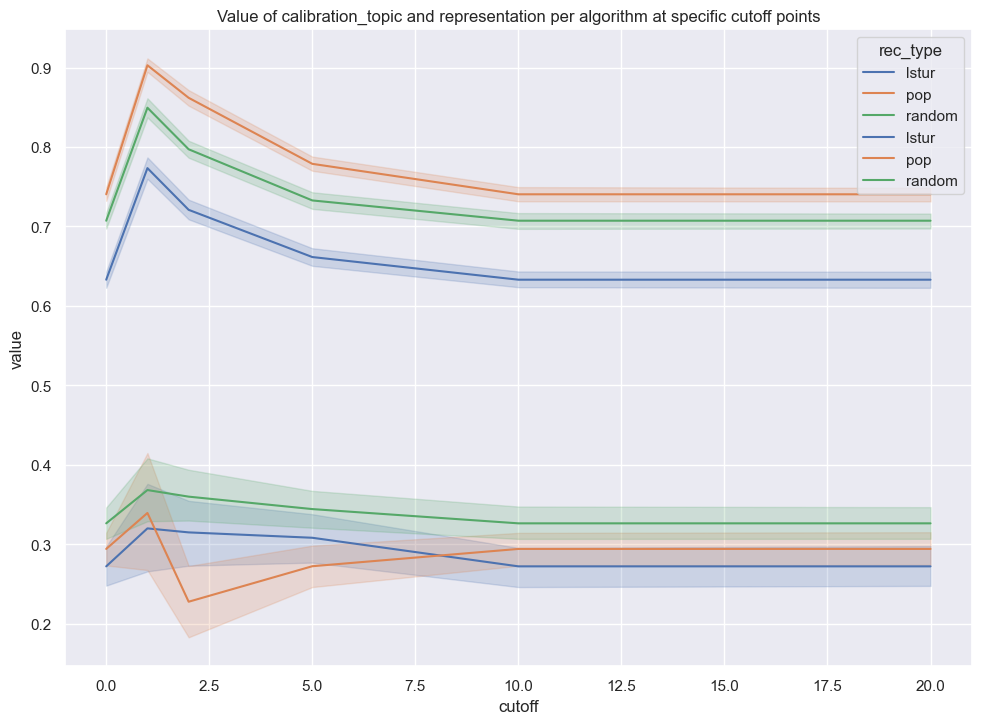

In [18]:
sns.lineplot(
    data=df[df['metric'] == 'calibration_topic'][df['discount'] == 'Y'],
    x="cutoff", y="value", hue="rec_type",
    markers=True, dashes=False
)
sns.lineplot(
    data=df[df['metric'] == 'representation'][df['discount'] == 'N'],
    x="cutoff", y="value", hue="rec_type",
    markers=True, dashes=False
).set_title('Value of calibration_topic and representation per algorithm at specific cutoff points')
plt.show()

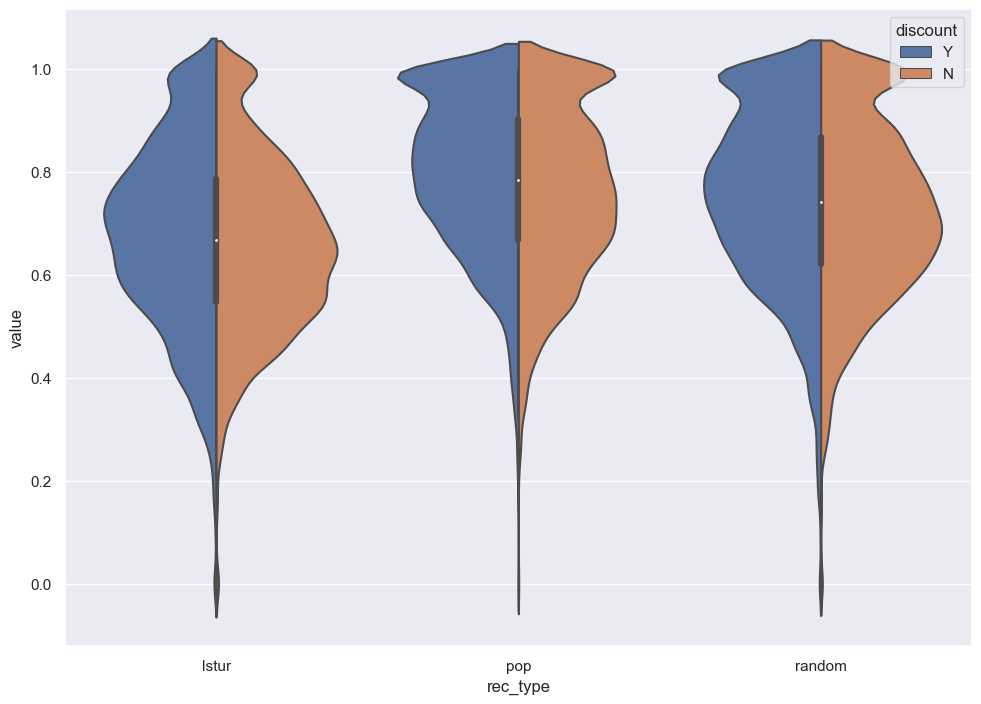

In [19]:
#RANDOM
sns.violinplot(data=df[df["metric"] == "calibration_topic"], x="rec_type", y="value", hue = 'discount', split=True)
plt.show()